In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/Money

/content/drive/MyDrive/AI/Money


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/Money/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/Money/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 977 images belonging to 11 classes.
Found 115 images belonging to 11 classes.


In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 40 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size) 
history=model.fit(training,epochs=40,batch_size=256,verbose=1, validation_data=validation)

Epoch 1/40
31/31 [==============================] - 253s 8s/step - loss: 2.5597 - accuracy: 0.0850 - val_loss: 2.3952 - val_accuracy: 0.0870
Epoch 2/40
31/31 [==============================] - 21s 683ms/step - loss: 2.3956 - accuracy: 0.0952 - val_loss: 2.3970 - val_accuracy: 0.0870
Epoch 3/40
31/31 [==============================] - 22s 701ms/step - loss: 2.3953 - accuracy: 0.1034 - val_loss: 2.3925 - val_accuracy: 0.1043
Epoch 4/40
31/31 [==============================] - 21s 671ms/step - loss: 2.3555 - accuracy: 0.1146 - val_loss: 2.3328 - val_accuracy: 0.1217
Epoch 5/40
31/31 [==============================] - 22s 707ms/step - loss: 2.2552 - accuracy: 0.1546 - val_loss: 2.3036 - val_accuracy: 0.0870
Epoch 6/40
31/31 [==============================] - 22s 701ms/step - loss: 2.0757 - accuracy: 0.2108 - val_loss: 2.2591 - val_accuracy: 0.1130
Epoch 7/40
31/31 [==============================] - 22s 705ms/step - loss: 2.0597 - accuracy: 0.2211 - val_loss: 2.1484 - val_accuracy: 0.1739
E

In [7]:
# Lưu 
model.save("TienVN.h5")
model_1=load_model('TienVN.h5')

In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.12096474319696426
Train Accuracy 0.9600818753242493


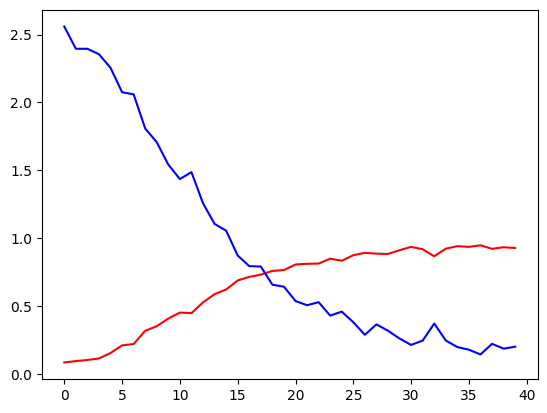

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 23ms/step
500K


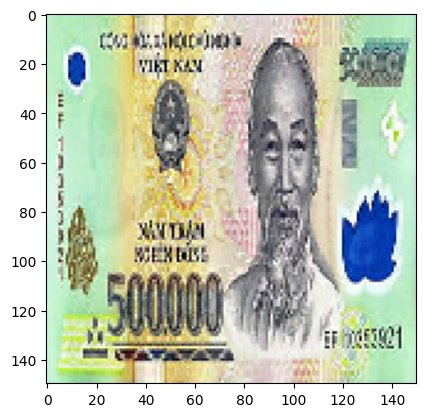

1/1 [==============================] - 0s 22ms/step
200dong


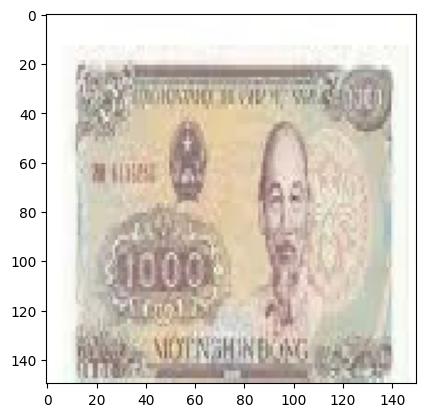

1/1 [==============================] - 0s 23ms/step
20K


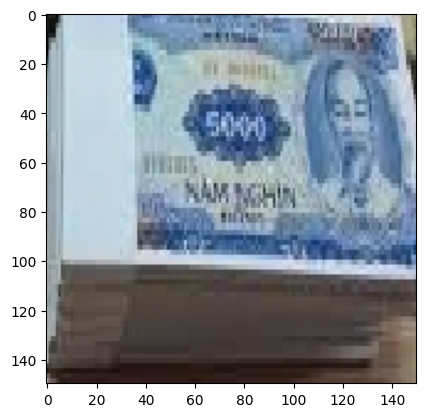

1/1 [==============================] - 0s 26ms/step
2K


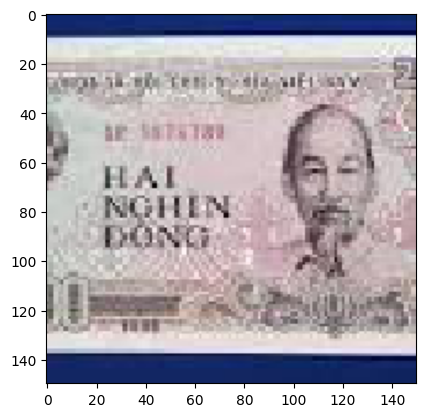

1/1 [==============================] - 0s 22ms/step
100K


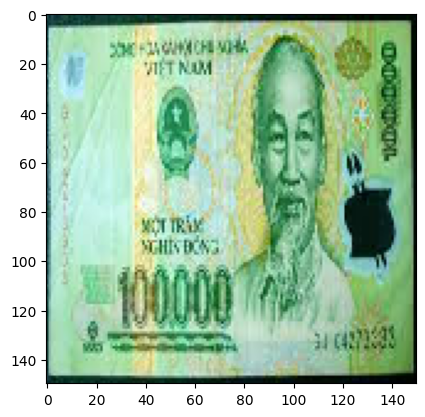

1/1 [==============================] - 0s 19ms/step
10K


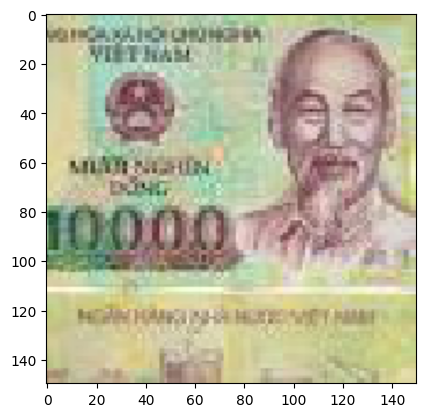

1/1 [==============================] - 0s 19ms/step
20K


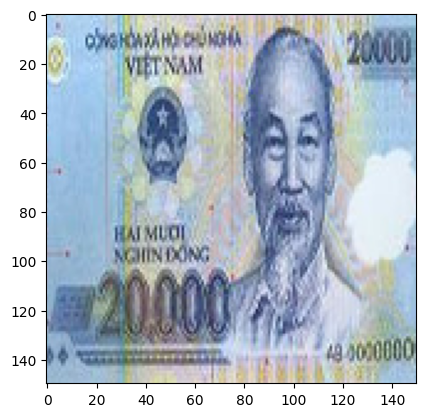

1/1 [==============================] - 0s 23ms/step
500dong


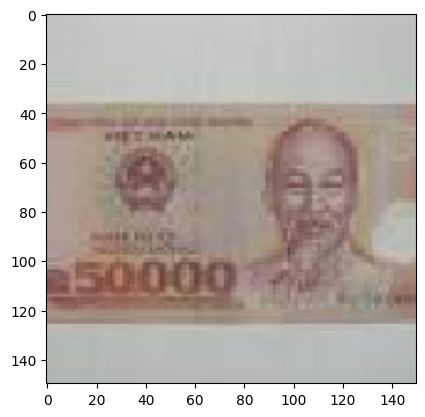

1/1 [==============================] - 0s 22ms/step
500dong


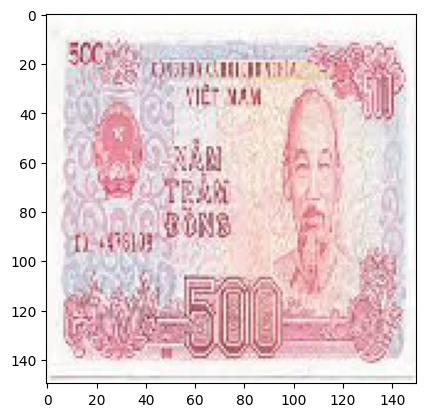

1/1 [==============================] - 0s 25ms/step
200dong


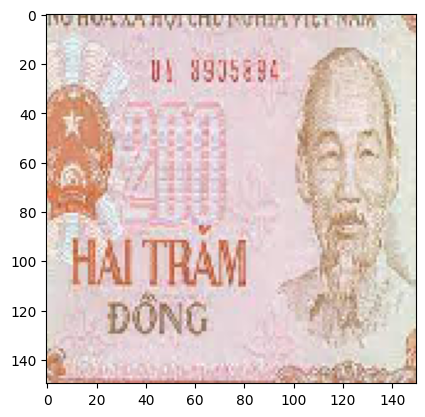

1/1 [==============================] - 0s 22ms/step
500dong


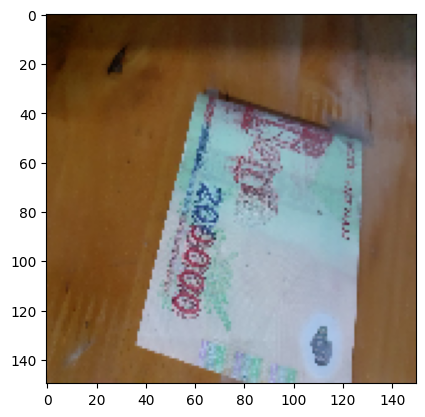

In [11]:
test="/content/drive/MyDrive/AI/Money/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['100K','10K','1K','200K','200dong','20K','2K','500K','500dong','50K','5K']
  print(class_name[result])
  plt.show()